<a href="https://colab.research.google.com/github/felipehigon/idal_ia3_uv/blob/main/Glass_Class_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

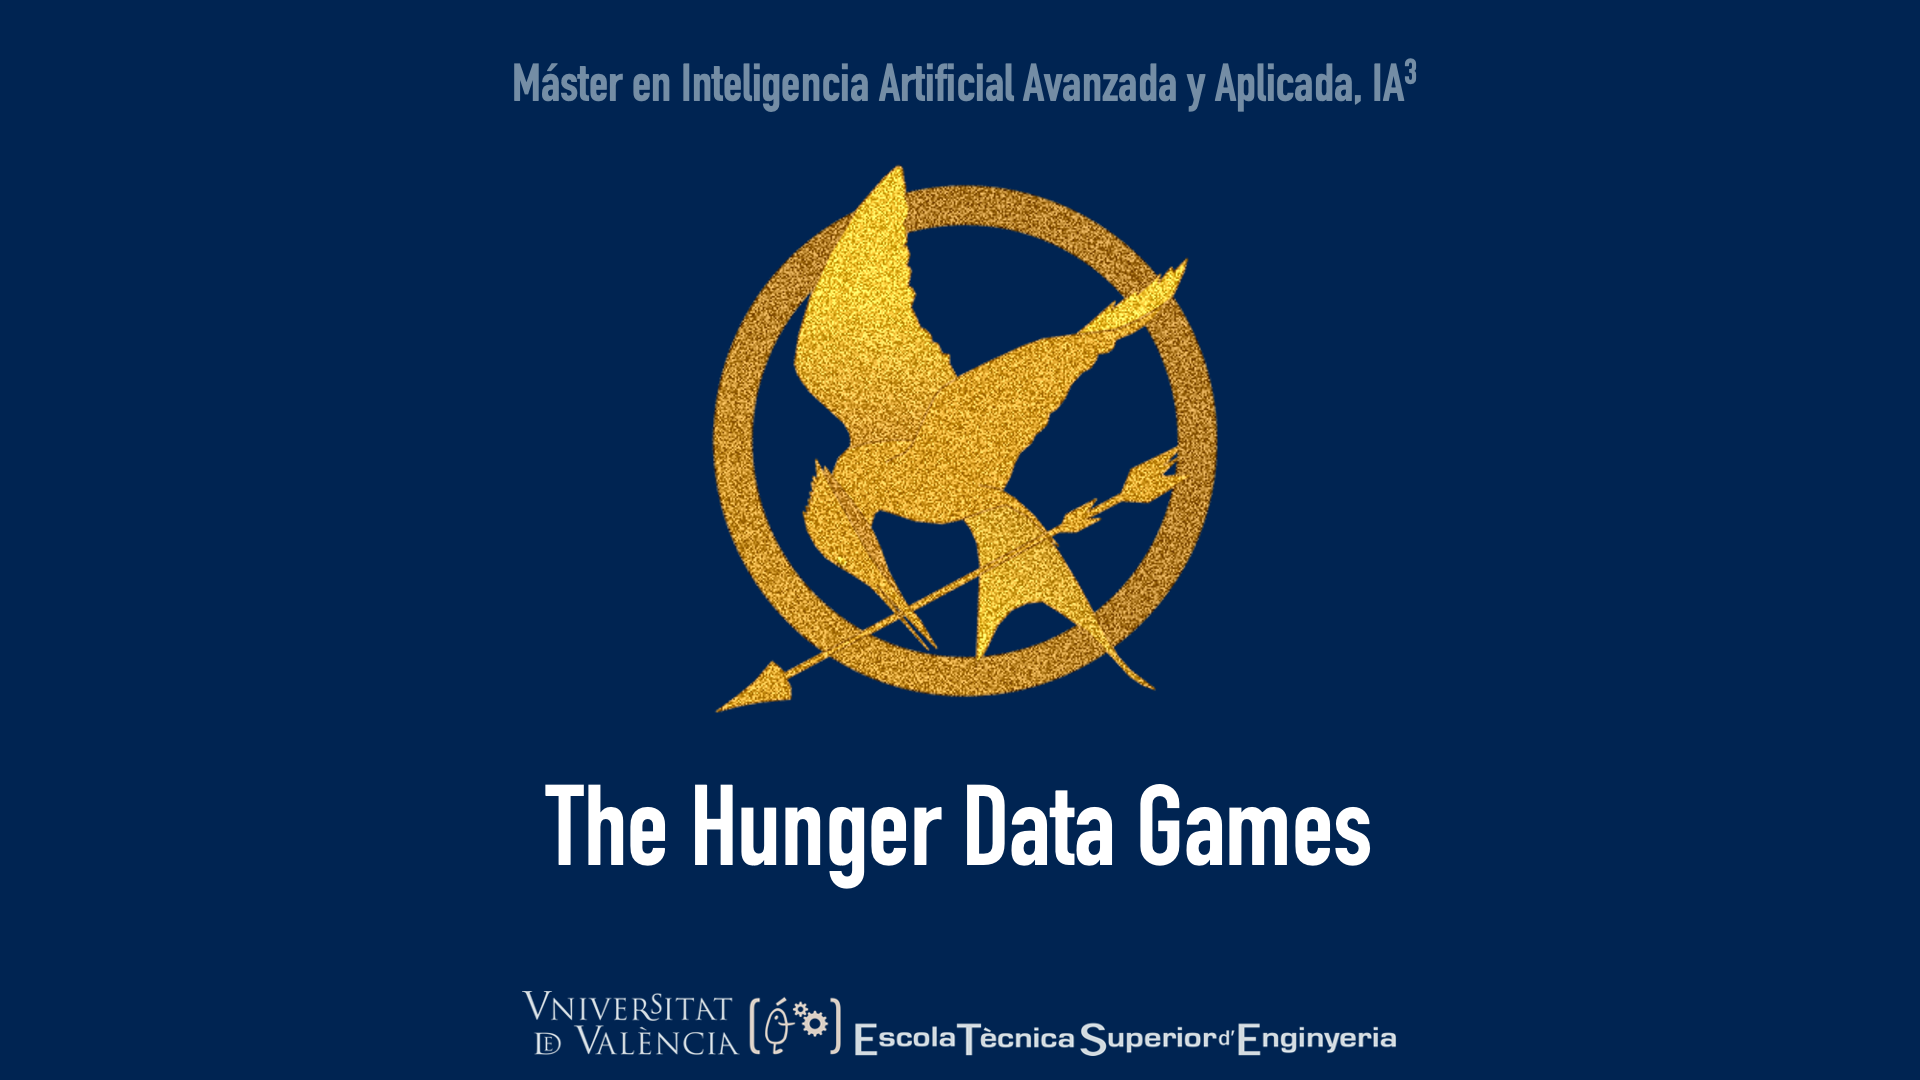

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:

# THE MACHINE'S LEARNING
Team members:
* Oscar Mateos Lopez
* Felipe Higón Martínez
* Francisco Jose Iniesta Cortijo

In [253]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, classification_report, make_scorer, balanced_accuracy_score, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import preprocessing, svm
from joblib import dump, load
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier
import warnings

#Seed
np.random.seed(123)

If Fit=False NO FIT GridSearch models in all notebook.

If FIt=True FIT GridSearch models in all notebook. (run time 6 hours)

The best model for GridSearch is listed in the notebook

In [247]:
Fit = False

# Load Dataframe And Pre-Proccesing

In [139]:
url = "https://raw.githubusercontent.com/felipehigon/idal_ia3_uv/main/glass.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

#dataframe.drop(['iron'],axis=1,inplace=True)
# Remove Outliers
#z = abs(stats.zscore(dataframe))
#dataframe = dataframe[(z < 3).all(axis=1)]

dataframe.shape

(214, 10)

In [140]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [141]:
dataframe.isnull().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

## Check if there are any outliers

<img src=https://i.stack.imgur.com/ZN8N6.png>

We will get them by boxplot: the function itself will store the ouliers when computes the boxplot, storing them on "fliers". 
Then we will generate an outlier-free dataset by dropping them stepwise from the original dataset recursively.

### refractive_index

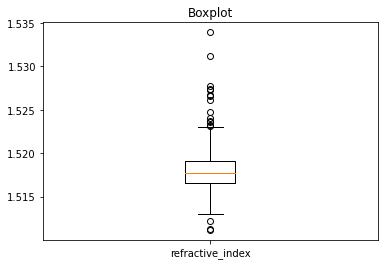

In [6]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['refractive_index'], labels=['refractive_index'])

In [7]:
# Get the outliers
ouliers_refractive_index = bp['fliers'][0].get_data()[1]
ouliers_refractive_index

array([1.51215, 1.51115, 1.51131, 1.52667, 1.5232 , 1.52725, 1.5241 ,
       1.52475, 1.53125, 1.53393, 1.52664, 1.52739, 1.52777, 1.52614,
       1.52369, 1.52315, 1.52365])

In [8]:
# Drop them from the dataset: Drops 9 rows
dataframe_no_ol = dataframe[~dataframe['refractive_index'].isin(ouliers_refractive_index)]
dataframe_no_ol.shape

(197, 10)

In [9]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

2    0.340102
1    0.340102
7    0.131980
3    0.086294
5    0.060914
6    0.040609
Name: type_of_glass, dtype: float64

### sodium

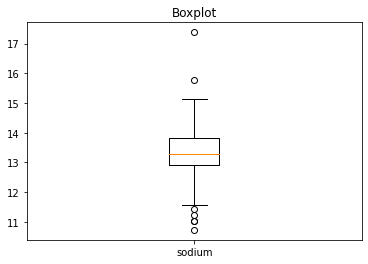

In [10]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['sodium'], labels=['sodium'])

In [11]:
# Get the outliers
ouliers_sodium = bp['fliers'][0].get_data()[1]
ouliers_sodium

array([11.45, 10.73, 11.23, 11.02, 11.03, 17.38, 15.79])

In [12]:
# Drop them from the dataset
dataframe_no_ol = dataframe_no_ol[~dataframe_no_ol['sodium'].isin(ouliers_sodium)]
dataframe_no_ol.shape

(196, 10)

In [13]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

2    0.341837
1    0.341837
7    0.132653
3    0.086735
5    0.056122
6    0.040816
Name: type_of_glass, dtype: float64

### magnesium

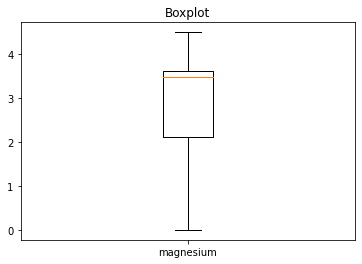

In [14]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['magnesium'], labels=['magnesium'])

In [15]:
# no outlier for magnesium

### aluminum

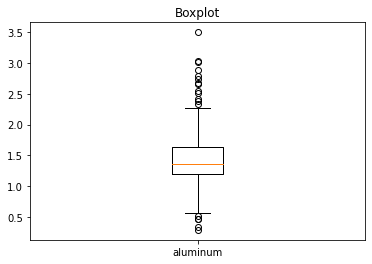

In [16]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['aluminum'], labels=['aluminum'])

In [17]:
# Get the outliers
ouliers_aluminum = bp['fliers'][0].get_data()[1]
ouliers_aluminum

array([0.29, 0.47, 0.47, 0.51, 0.34, 3.5 , 3.04, 3.02, 2.38, 2.79, 2.68,
       2.54, 2.34, 2.66, 2.51, 2.42, 2.74, 2.88])

In [18]:
# Drop them from the dataset
dataframe_no_ol = dataframe_no_ol[~dataframe_no_ol['aluminum'].isin(ouliers_aluminum)]
dataframe_no_ol.shape

(180, 10)

In [19]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

2    0.372222
1    0.355556
3    0.094444
7    0.088889
6    0.044444
5    0.044444
Name: type_of_glass, dtype: float64

### silicon

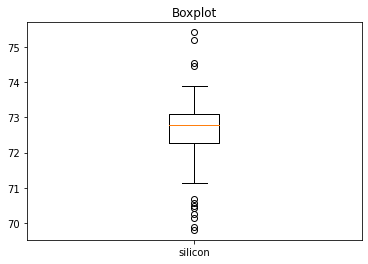

In [20]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['silicon'], labels=['silicon'])

In [21]:
# Get the outliers
ouliers_silicon = bp['fliers'][0].get_data()[1]
ouliers_silicon

array([70.57, 69.81, 70.16, 69.89, 70.48, 70.7 , 70.26, 70.43, 74.45,
       74.55, 75.41, 75.18])

In [22]:
# Drop them from the dataset
dataframe_no_ol = dataframe_no_ol[~dataframe_no_ol['silicon'].isin(ouliers_silicon)]
dataframe_no_ol.shape

(176, 10)

In [23]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

2    0.375000
1    0.363636
3    0.096591
7    0.079545
5    0.045455
6    0.039773
Name: type_of_glass, dtype: float64

### potassium

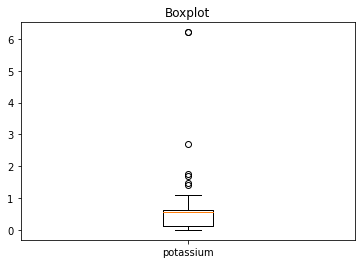

In [24]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['potassium'], labels=['potassium'])

In [25]:
# Get the outliers
ouliers_potassium = bp['fliers'][0].get_data()[1]
ouliers_potassium

array([1.68, 6.21, 6.21, 1.76, 1.46, 2.7 , 1.41])

In [26]:
# Drop them from the dataset
dataframe_no_ol = dataframe_no_ol[~dataframe_no_ol['potassium'].isin(ouliers_potassium)]
dataframe_no_ol.shape

(174, 10)

In [27]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

2    0.379310
1    0.367816
3    0.097701
7    0.068966
5    0.045977
6    0.040230
Name: type_of_glass, dtype: float64

### calcium

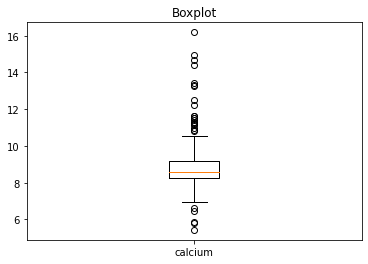

In [28]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['calcium'], labels=['calcium'])

In [29]:
# Get the outliers
ouliers_calcium = bp['fliers'][0].get_data()[1]
ouliers_calcium

array([ 5.87,  6.65,  5.43,  5.79,  6.47, 11.64, 10.79, 13.24, 13.3 ,
       16.19, 11.52, 10.99, 14.68, 14.96, 14.4 , 11.14, 13.44, 11.41,
       11.62, 11.53, 11.32, 12.24, 12.5 , 11.27, 10.88, 11.22])

In [30]:
# Drop them from the dataset
dataframe_no_ol = dataframe_no_ol[~dataframe_no_ol['calcium'].isin(ouliers_calcium)]
dataframe_no_ol.shape

(165, 10)

In [31]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

2    0.387879
1    0.387879
3    0.103030
7    0.072727
6    0.030303
5    0.018182
Name: type_of_glass, dtype: float64

### barium

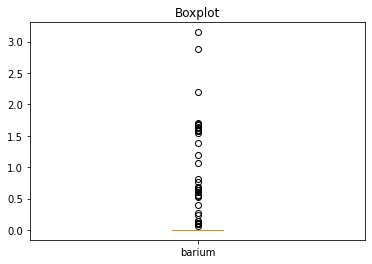

In [32]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['barium'], labels=['barium'])

In [33]:
# Get the outliers
ouliers_barium = bp['fliers'][0].get_data()[1]
ouliers_barium

array([0.09, 0.11, 0.69, 0.14, 0.11, 3.15, 0.27, 0.09, 0.06, 0.15, 2.2 ,
       0.24, 1.19, 1.63, 1.68, 0.76, 0.64, 0.4 , 1.59, 1.57, 0.61, 0.81,
       0.66, 0.64, 0.53, 0.63, 0.56, 1.71, 0.67, 1.55, 1.38, 2.88, 0.54,
       1.06, 1.59, 1.64, 1.57, 1.67])

In [34]:
# Drop them from the dataset
dataframe_no_ol = dataframe_no_ol[~dataframe_no_ol['barium'].isin(ouliers_barium)]
dataframe_no_ol.shape

(143, 10)

In [35]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

1    0.426573
2    0.412587
3    0.111888
6    0.034965
5    0.013986
Name: type_of_glass, dtype: float64

### iron

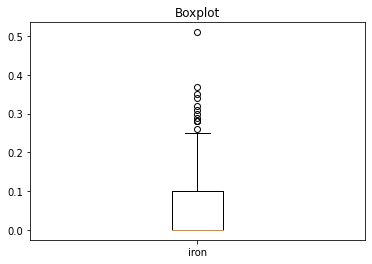

In [36]:
# Get the Boxplot
fig, ax = plt.subplots()
ax.set_title('Boxplot')
bp = ax.boxplot(dataframe['iron'], labels=['iron'])

In [37]:
# Get the outliers
ouliers_iron = bp['fliers'][0].get_data()[1]
ouliers_iron

array([0.26, 0.3 , 0.31, 0.32, 0.34, 0.28, 0.29, 0.28, 0.35, 0.37, 0.51,
       0.28])

In [38]:
# Drop them from the dataset
dataframe_no_ol = dataframe_no_ol[~dataframe_no_ol['iron'].isin(ouliers_iron)]
dataframe_no_ol.shape

(136, 10)

In [39]:
# Check class distribution after removal change
dataframe_no_ol['type_of_glass'].value_counts(normalize=True)

1    0.433824
2    0.404412
3    0.110294
6    0.036765
5    0.014706
Name: type_of_glass, dtype: float64

Eliminating outliers and partitioning we will see if the weights of the classes are similar to the originals.

PROBLEM! - Class 7 has disappeared after the elimination of outliers (using Javi's initial dataset, using the complete no but the weights of the classes change a lot). So, we decide NOT REMOVE OUTLIERS.

# Feature Analysis

In [40]:
dataframe.describe()

refractive_index      sodium  ...        iron  type_of_glass
count        214.000000  214.000000  ...  214.000000     214.000000
mean           1.518365   13.407850  ...    0.057009       2.780374
std            0.003037    0.816604  ...    0.097439       2.103739
min            1.511150   10.730000  ...    0.000000       1.000000
25%            1.516523   12.907500  ...    0.000000       1.000000
50%            1.517680   13.300000  ...    0.000000       2.000000
75%            1.519157   13.825000  ...    0.100000       3.000000
max            1.533930   17.380000  ...    0.510000       7.000000

[8 rows x 10 columns]

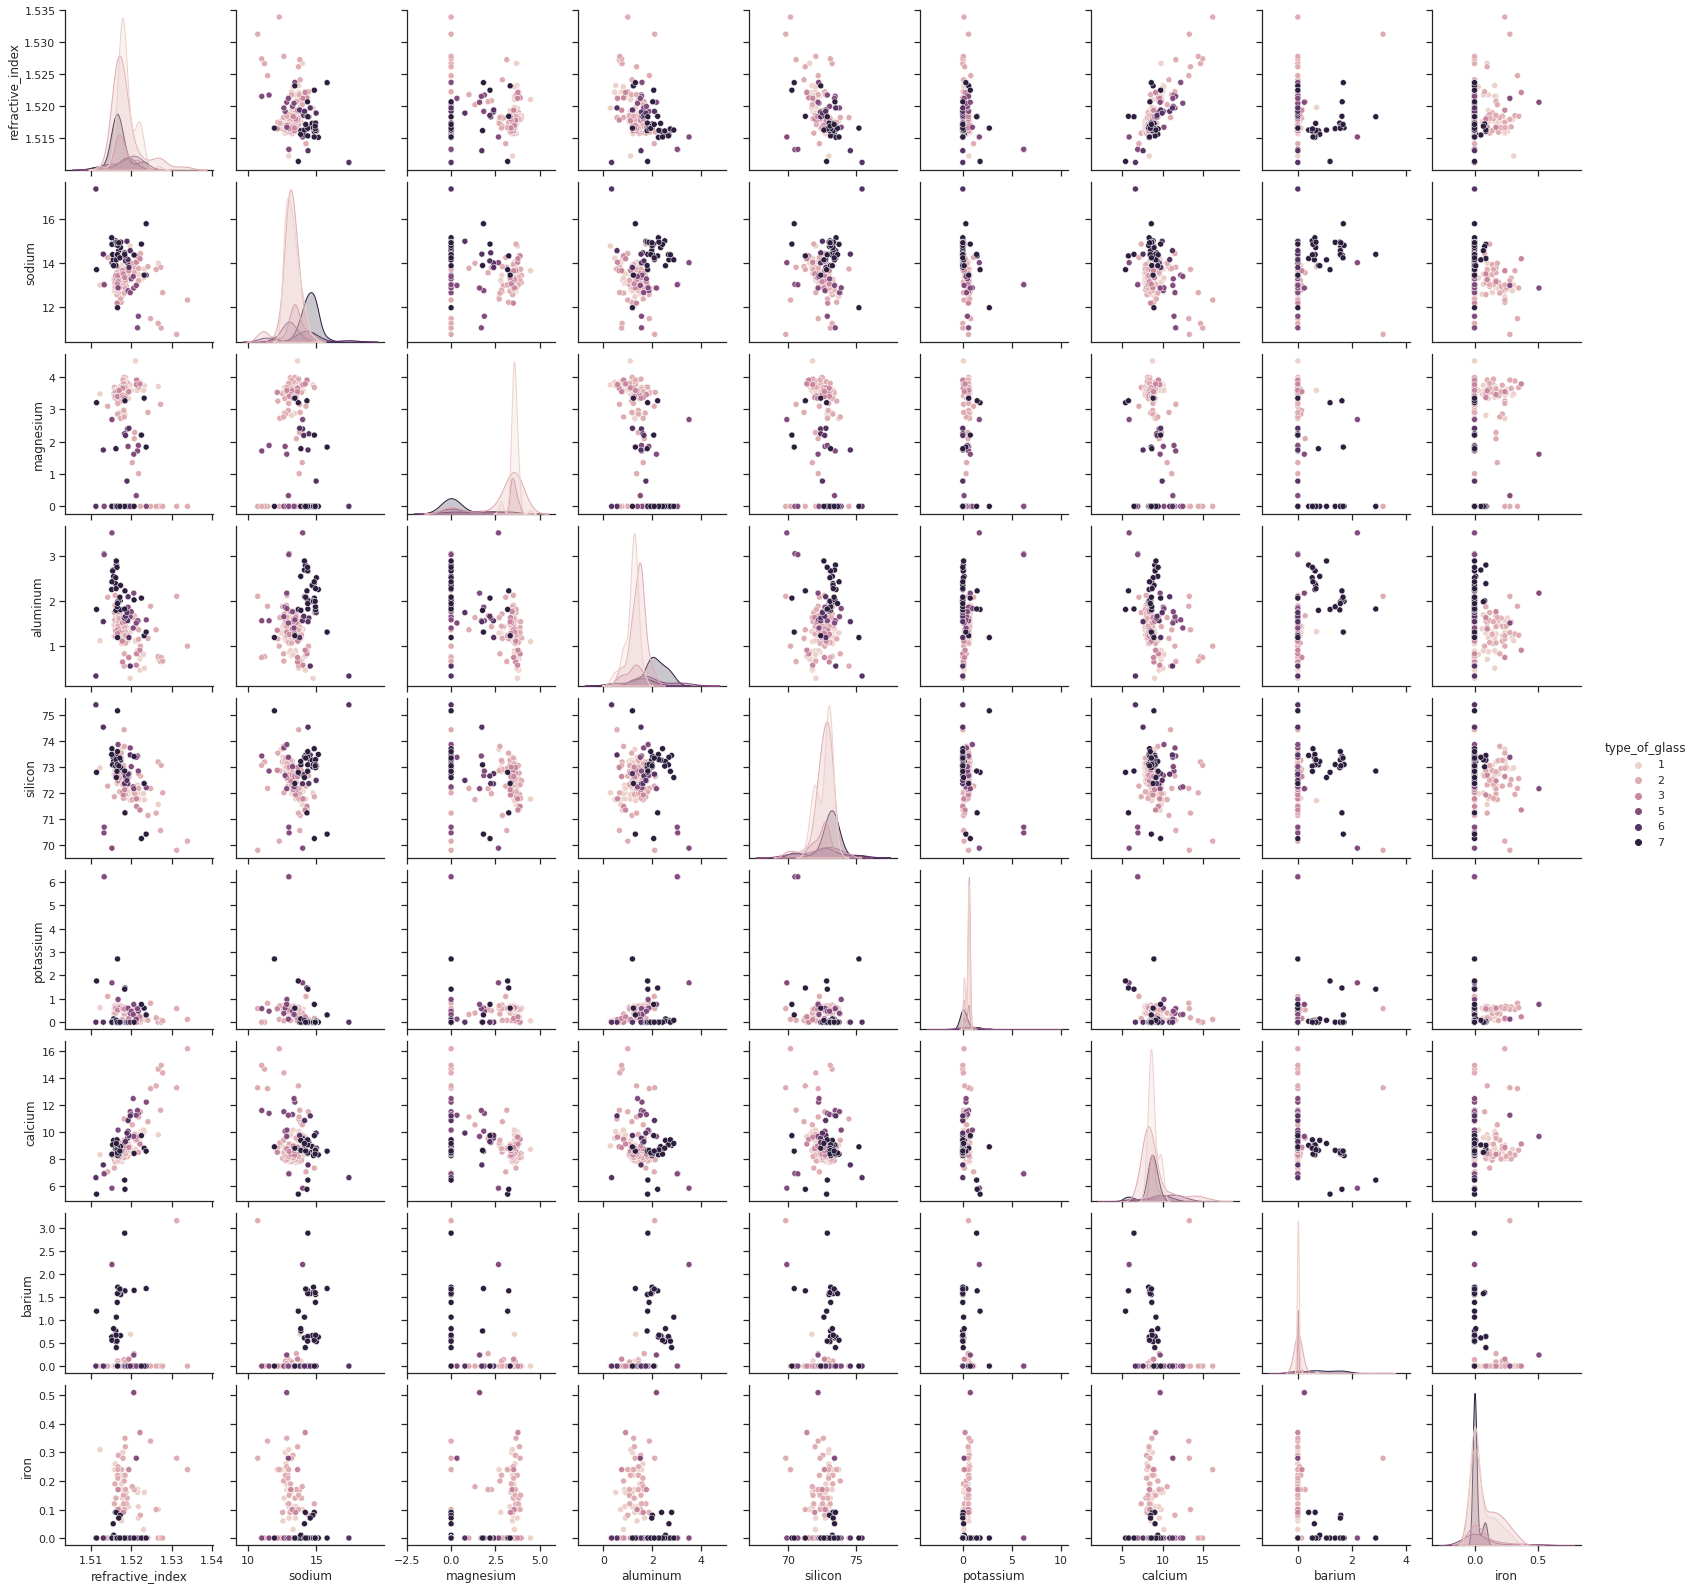

In [41]:
# SEE SCATTER MATRIX

warnings.filterwarnings("ignore")

sns.set_theme(style="ticks")
scatter = sns.pairplot(dataframe, hue="type_of_glass")

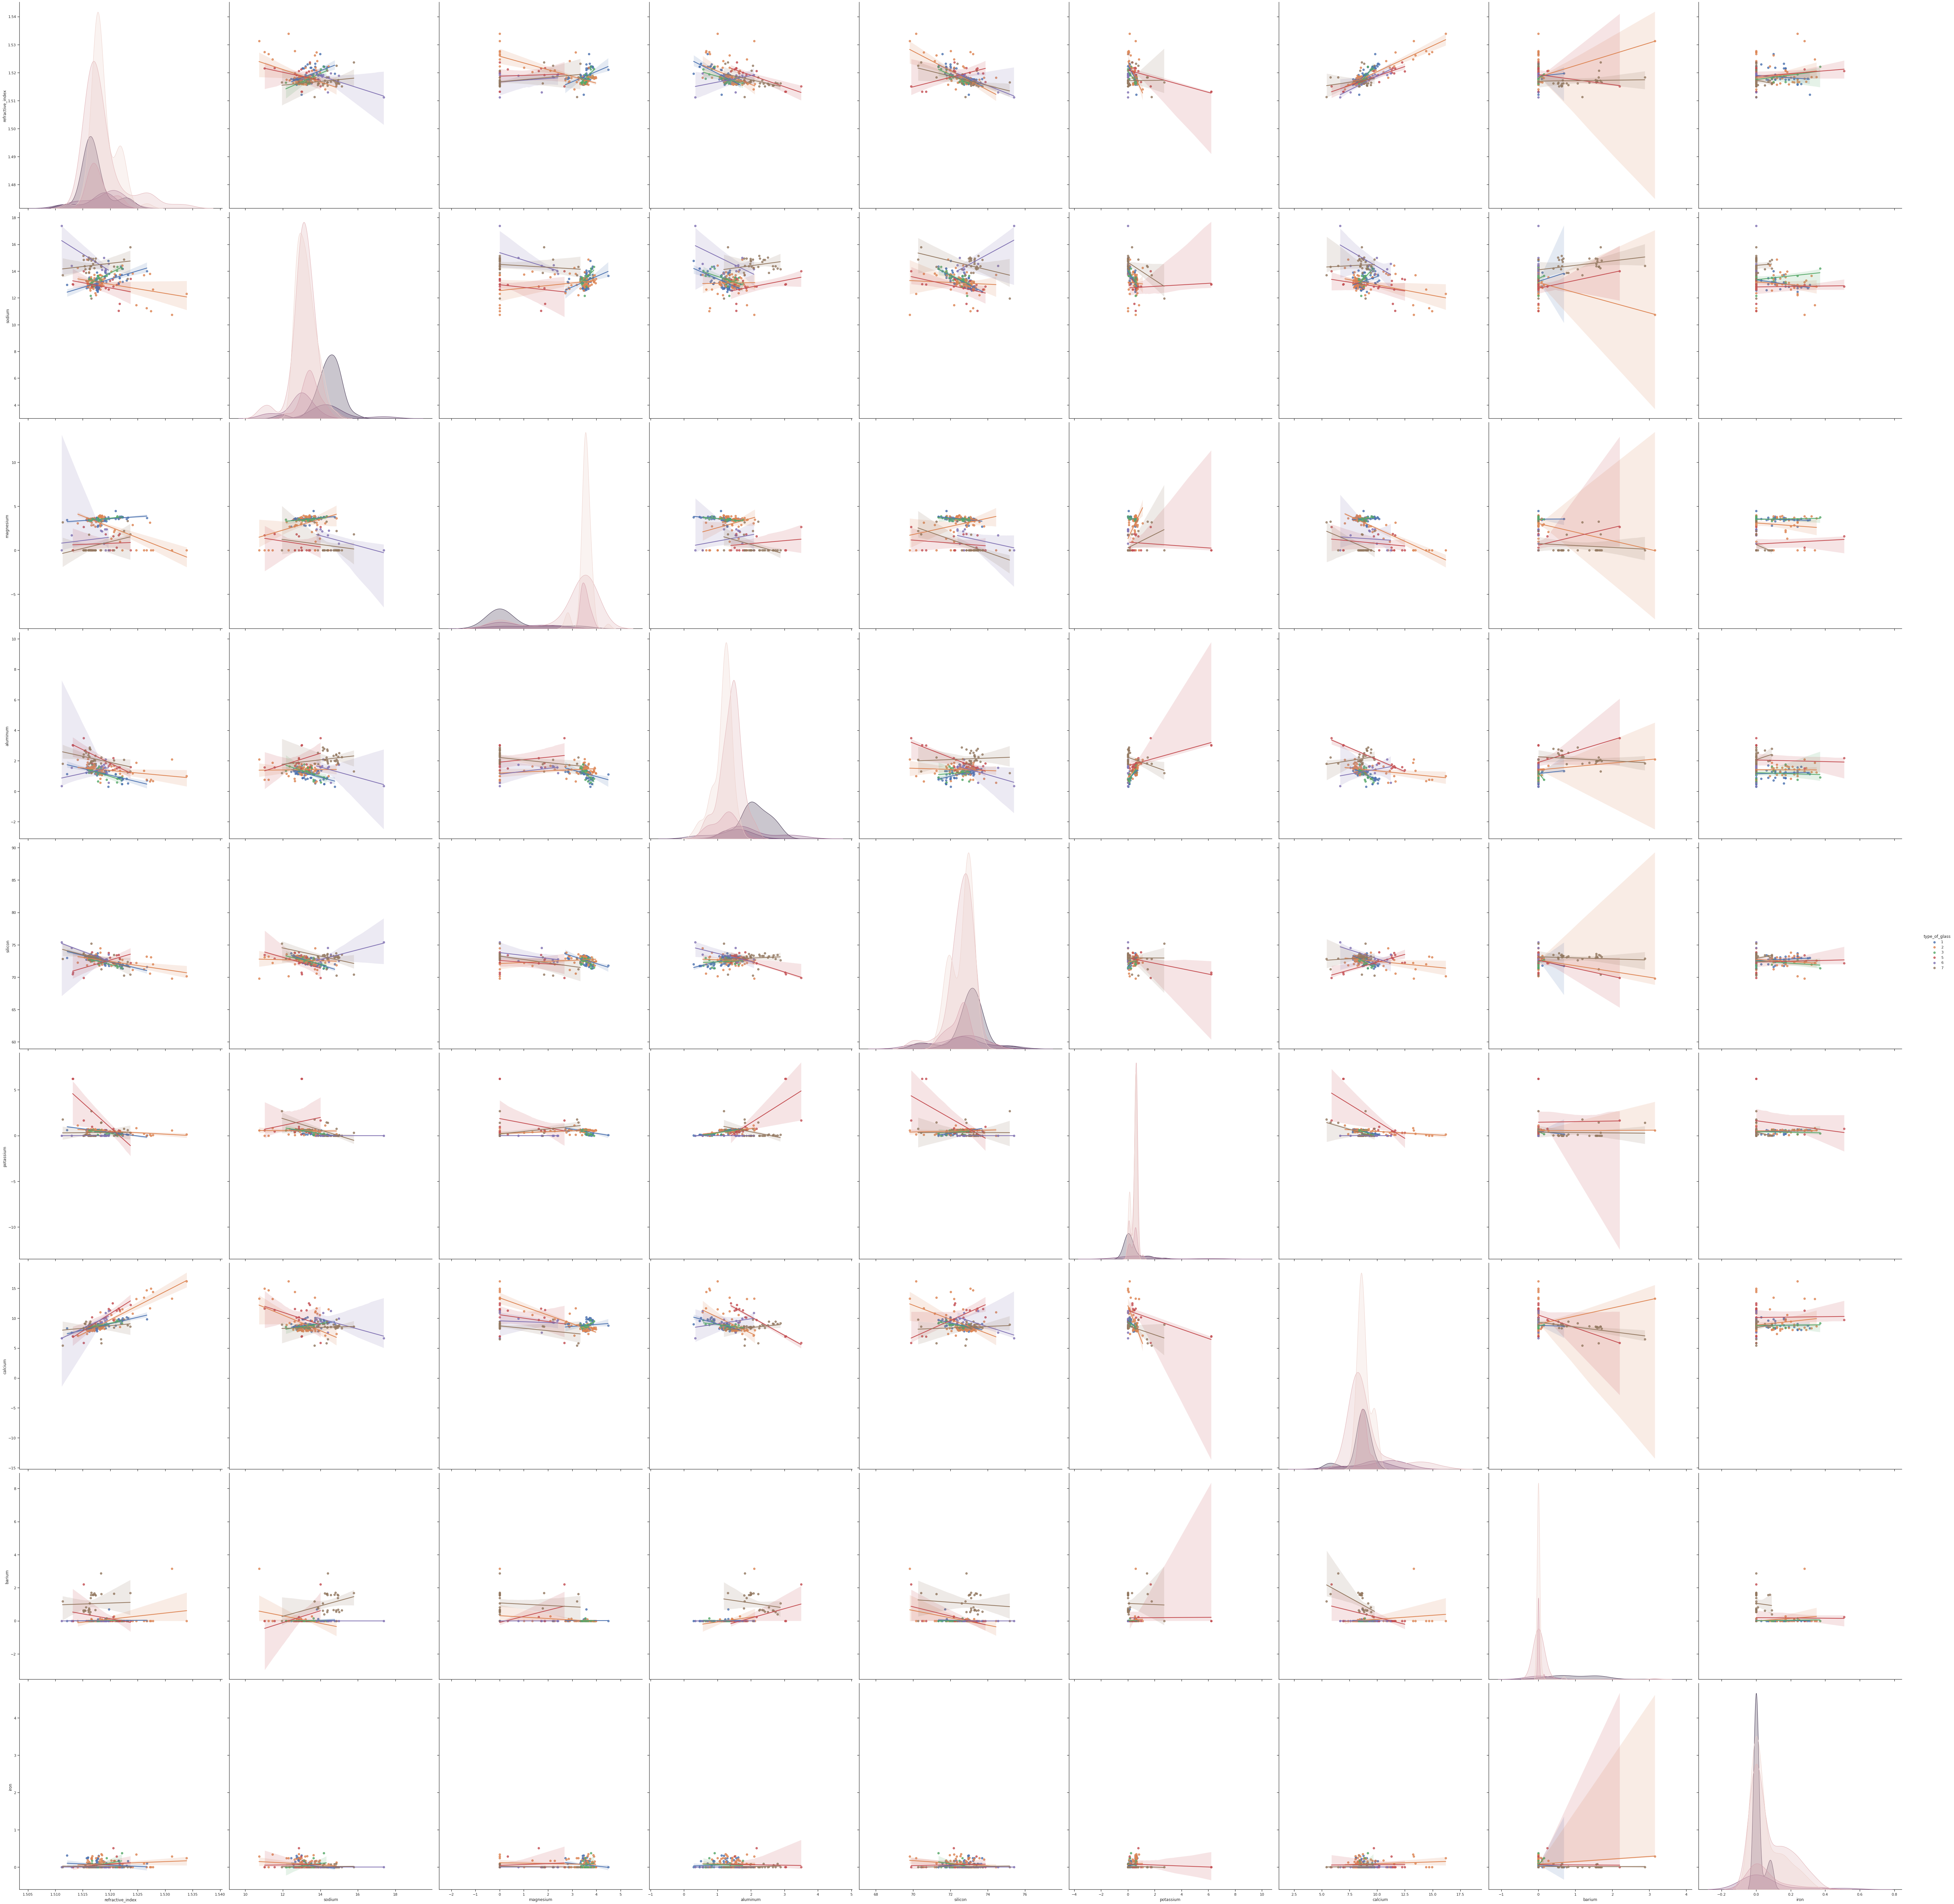

In [42]:
sns.pairplot(dataframe.dropna(), hue='type_of_glass',height=9,vars=["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"],kind='reg')

In [43]:

fig = px.scatter(dataframe, x="calcium", y="refractive_index" , color="type_of_glass")
fig.show()

In [44]:
fig = px.scatter(dataframe, x="barium", y="aluminum" , color="type_of_glass")
fig.show()

# Train Test And Validation Data

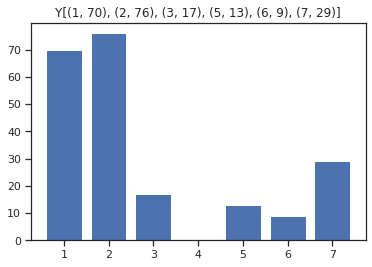

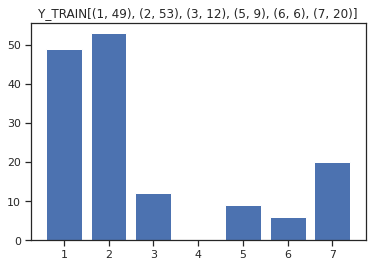

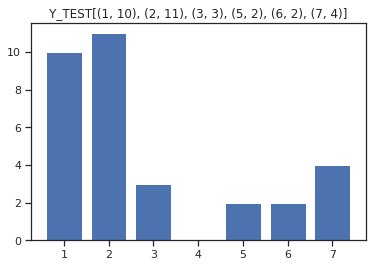

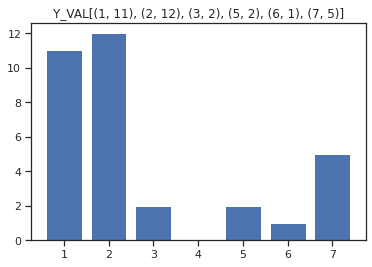

In [142]:
def plot_classes(Y, title):
  # function to show values on bars
  Y_counts = dict(Y['type_of_glass'].value_counts())
  plt.bar(list(Y_counts.keys()), Y_counts.values())
  #plt.title((Y_counts.items()))
  title += str(sorted(Y_counts.items()))
  plt.title(title)
  plt.show()

# Default values:
# Train:      70%
# Test:       15%
# Validation: 15%
# If Val_size = 0 then only a train test split will be performed

def train_test_Val(dataframe,Y_col,Test_size=0.30, Val_size=0.50, Normalize=True):

  X = dataframe.drop([Y_col], axis=1)
  Y = dataframe.loc[:,[Y_col]]

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = Test_size, stratify=Y)
  
  if Val_size > 0:
    # Val_size applies over initial test size
    X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = Val_size, stratify= Y_test)

  # Normalize with X_train for all datas
  if Normalize:
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_test = scaler.transform(X_test)
    X_val = scaler.transform(X_val)
    if Val_size > 0:
      X_train = scaler.transform(X_train)

  plot_classes(Y, "Y")
  plot_classes(Y_train, "Y_TRAIN")
  plot_classes(Y_test, "Y_TEST")
  if Val_size > 0:
    plot_classes(Y_val, "Y_VAL")
    return X, Y, X_train, X_test, Y_train, Y_test, X_val, Y_val
  else:
    return X, Y, X_train, X_test, Y_train, Y_test


X, Y, X_train, X_test, Y_train, Y_test, X_val, Y_val = train_test_Val(dataframe,'type_of_glass')

# Train and Evaluate Functions

In [143]:
def Matrix(Y_true,Y_pred):
  confm=pd.crosstab(Y_true, Y_pred)
  d_cm=pd.DataFrame(confm, index=None)
  grafica=sns.heatmap(d_cm,cmap='Pastel1', annot=True)
  plt.ylabel('Valores verdaderos')
  plt.xlabel('Predicciones')
  grafica.set(xlabel='Verdaderos', ylabel='Predicciones')
  plt.show()


In [144]:
def get_class_AUC_ROC_predict_proba(model, x_train, y_train, x_test, y_test):
  
  
  # Learn to predict each class against the other
  classifier = OneVsRestClassifier(model)
  y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=classifier.classes_)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test, classes=classifier.classes_).ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  
  #Compute macro-average ROC curve and ROC area
  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classifier.classes_))]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(len(classifier.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= len(classifier.classes_)

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
  # Plot all ROC curves
  # Micro
  plt.figure()
  plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
  # Macro
  plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

  colors = ['black', 'darkorange', 'blue', 'red', 'green', 'yellow']
  for i, label, color in zip(range(len(classifier.classes_)), classifier.classes_, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(label, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multi-class ROC (Hunger_games)')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  
  return plt.show()

In [145]:
#Transform into 0-1 class probabilities
def new_probs_class(y_test ,pos_class):
    new_probs = []
    
    for value in y_test['type_of_glass']:
        if value == pos_class:
            new_probs.append(1.0)
        else:
            new_probs.append(0.0)
    return new_probs

#Print AUC score and plot ROC curve for each class
def get_class_AUC_ROC(model, x_test, y_test, plot_curve=True):
    
    i = 0
    auc=[]
    for label in model.classes_:
        y_test_class = new_probs_class(y_test , label)
        
        #Class exists at y_test
        
        if any(y_test_class):
            # AUC score
            y_test_class_auc = roc_auc_score(y_test_class, model.predict_proba(x_test)[:,i])
            auc.append(y_test_class_auc)
            auc_text = f"Class {label} AUC: {y_test_class_auc}"
            
            if plot_curve == True:
                # ROC curve
                fpr, tpr, thresholds = roc_curve(y_test_class, list(model.predict_proba(x_test)[:,i]), drop_intermediate=False)
                df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
                fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'], title=auc_text)
                fig.show()
            else:
                #print(auc_text)
                pass
        #Class doesn't exist at y_test
        else:
            if plot_curve == True:
                # AUC score
                print(f"Class {label} AUC: There is not any observation for Class {label} from y_test\n\n")
            else:
                print(f"Class {label} AUC: There is not any observation for Class {label} from y_test")    
                
        i=+1
    return auc

We tried use PCA for reduce dimensionality in our model. But the results did not work well. So we will only show the PCA but do not use it.

In [146]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=5)
#pcaTrain = pca.fit_transform(x_train)
#pcaTest=pca.fit_transform(x_test)
#pcaTraindf= pd.DataFrame(data = pcaTrain
#             , columns = ['principal_component_1', 'principal_component_2', 'principal_component_3', 'principal_component_4', 'principal_component_5'])
#pcaTestdf=pd.DataFrame(data=pcaTest, columns=['principal_component_1', 'principal_component_2', 'principal_component_3', 'principal_component_4', 'principal_component_5'])

#print(pcaTraindf)
#print(pcaTestdf)

Function for doing a Grid Search from DecisionTreeClassifier.

If Grid=False return best models for:

+ DecisionTree Classifier
+ Random Forest
+ AUC for both models

If Grid=True return the above plus a GridSearch with n_estimators, increase the processing time. 

In [147]:
def GridSearch(model, param_grid, scoring, x_train, y_train):
    cv = GridSearchCV(model, param_grid, scoring, cv=5, verbose=1)
    cv.fit(x_train, np.ravel(y_train))
    cv.cv_results_
    model_best = cv.best_estimator_
    return model_best



def GenerateModel(x_train, y_train,x_test, y_test, param_grid, scoring,  plot_curve=True, Print=True, Grid=False):
    
    param_gridR = param_grid.copy()
    param_grid.pop('n_estimators')
    model = DecisionTreeClassifier()
    #model = DecisionTreeClassifier(min_samples_split=2,max_depth=6,criterion='entropy')
    #model.fit(x_train, y_train)
    #score = model.score(x_test, y_test)

    model_best = GridSearch(model, param_grid, scoring, x_train, y_train)
    y_pred=model_best.predict(x_test)
    y_true=y_test.type_of_glass
    if Print:
      print("GRID SEARCH DECISION TREE CLASSIFIER:\n")
      Matrix(y_true,y_pred)
      print(classification_report(y_true, y_pred))
    
    AUC_best=get_class_AUC_ROC(model_best,x_test,y_test,plot_curve)
  
    modelR =RandomForestClassifier(n_estimators=31, ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=model_best.max_depth, max_features=model_best.max_features, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=model_best.min_samples_split,
                       min_weight_fraction_leaf=0.0 ,
                       random_state=None)
    modelR.fit(x_train, np.ravel(y_train))
    y_predR=modelR.predict(x_test)
    if Print:
      print("RANDOM FOREST:\n")
      Matrix(y_true,y_predR)
      print(classification_report(y_true, y_predR))
    
    AUC_R=get_class_AUC_ROC(modelR,x_test,y_test,plot_curve)

    if Grid:
      modelR_best = GridSearch(modelR, param_gridR, scoring, x_train, y_train)
      y_predR2=model_best.predict(x_test)
      if Print:
        print("GRID SEARCH RANDOM FOREST:\n")
        Matrix(y_true,y_predR2)
        print(classification_report(y_true, y_predR2))
        
      AUC_Rbest=get_class_AUC_ROC(modelR_best,x_test,y_test,plot_curve)
      return model_best, modelR, modelR_best, AUC_best, AUC_R, AUC_Rbest
    else:
      return model_best, modelR, AUC_best, AUC_R


#Model Definition. Grid Search

## Decision Tree and Random Forest

In [148]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10,11], 'min_samples_split': [2,3,4,5,6,7], 
              'max_features': list(range(1,10)), 'n_estimators':[30,31]}
scoring="f1_micro"
if Fit:
  modelo_AUC_T, modelo_AUC_R, AUC_best, AUC_R = GenerateModel(X_train,Y_train,X_test,Y_test,param_grid,scoring,plot_curve=False)

Grid Search for decision tree and random forest classifiers.
Best Model: modelo_AUC_R (Random Forest with 31 estimators)


In [149]:
if Fit:
  modelo_AUC_R

modelo_AUC_R=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', 
                                    max_depth=8, max_features=3, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, 
                                    min_impurity_split=None, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, 
                                    n_estimators=31, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###Feature Importance Random Forest


Feature: 0, Score RF: 0.10015
Feature: 1, Score RF: 0.15356
Feature: 2, Score RF: 0.19319
Feature: 3, Score RF: 0.16069
Feature: 4, Score RF: 0.08025
Feature: 5, Score RF: 0.08759
Feature: 6, Score RF: 0.12461
Feature: 7, Score RF: 0.06730
Feature: 8, Score RF: 0.03266


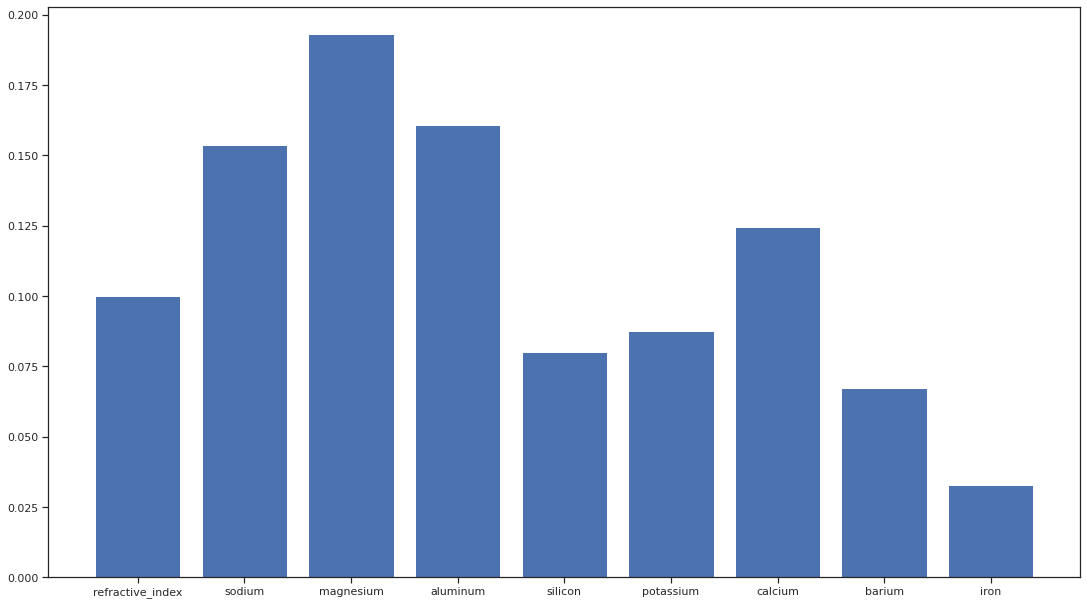

In [230]:
# get importance
modelo_AUC_R.fit(X_train,Y_train)
importance = modelo_AUC_R.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score RF: %.5f' % (i,v))
# plot feature importance
plt.bar(list(dataframe.columns.drop('type_of_glass')), importance)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Manualy Tunning Hiper-parameters
Search the best models grouping classes two by two. 

The function sum AUC for three classes (two classes that predict and class 0: group of the other classes) and saves the models (each model only predicts two classes) that has a sum of AUC more than 2. (Max=3).
The dictionary modelos has the next indices:

*First index: Name of the model (12,13,14....)

Second index:

0: DecisionTree Model

1: RandomForest Model

2: Sum AUC for Decision Tree

3: Sum AUC for Random Forest


In [243]:
#Search the best models grouping classes 1 2,1 3,1 5.....

if Fit:
  a = [1,2,3,5,6,7]
  modelos = {}
  DecisionTree = []
  RandomForest = []
  for x in a:
    for y in a:
      if x!=y:
        print(x,y)
        b= a.copy()
        b.remove(x)
        b.remove(y)
        #print(dict(zip(b,[0,0,0,0])))
        Y_trainXX = Y_train.replace(dict(zip(b,[0,0,0,0])))
        Y_testXX = Y_test.replace(dict(zip(b,[0,0,0,0])))
        param_grid = {'max_depth': [3,4,5,6,7,8,9,10,11], 'min_samples_split': [2,3,4,5,6,7], 
                      'max_features': list(range(1,10)), 'n_estimators':[30,31]}
        scoring="f1_micro"
        modelo_T, modelo_R, AUC_best, AUC_R = GenerateModel(X_train,Y_trainXX,X_test,Y_testXX,param_grid,scoring,plot_curve=False, Print=False)
        if sum(AUC_best)>2 or sum(AUC_R)>2:
          DecisionTree.append(round(sum(AUC_best),2))
          RandomForest.append(round(sum(AUC_R),2))
          lista =[modelo_T, modelo_R, AUC_best, AUC_R]
          clave = (x *10) + y
          modelos[clave] = lista


1 2
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 3
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 5
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 6
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 7
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2 1
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2 3
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2 5
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2 6
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2 7
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3 1
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3 2
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3 5
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3 6
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3 7
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5 1
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5 2
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5 3
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5 6
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5 7
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6 1
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6 2
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6 3
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6 5
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6 7
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7 1
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7 2
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7 3
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7 5
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7 6
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:    4.1s finished


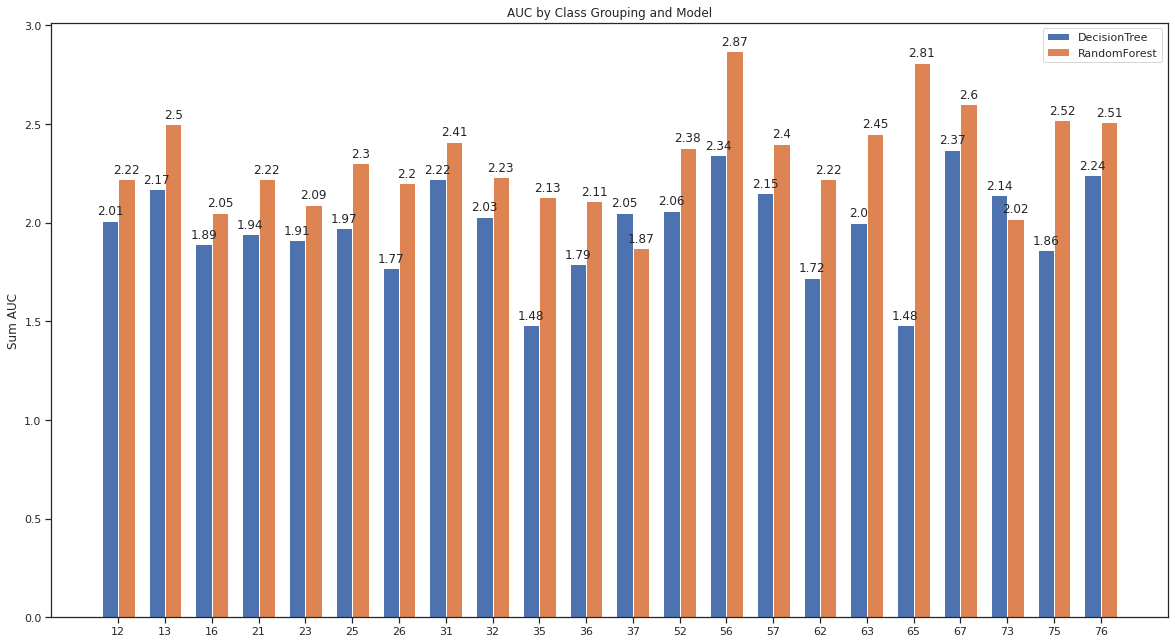

In [246]:

if Fit:
  labels = modelos.keys()

  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, DecisionTree, width, label='DecisionTree')
  rects2 = ax.bar(x + width/2, RandomForest, width, label='RandomForest')

# Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Sum AUC')
  ax.set_title('AUC by Class Grouping and Model')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()



  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.show()

According the bar diagram we select the best models and the model that predicts all classes (modelo_AUC_R)

### Voting Classifier
We use a VotingClassifier for mixing models

#### Model 65:
Predicts classes 6 and 5

In [152]:
if Fit:
  modelos[65][1]

model65 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=9, max_features=5, 
                                 max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                                 min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None, oob_score=False, 
                                 random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



#### Model 56:
Predicts classes 5 and 6

In [153]:
if Fit:
  modelos[56][1]
 
model56 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=9, max_features=5, 
                                  max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                                  min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None, oob_score=False, 
                                  random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



#### Model 76:
Predicts classes 7 and 6

In [154]:
if Fit:
 modelos[76][1]

model76 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=9, max_features=5, 
                                 max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                                 min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None, oob_score=False, 
                                 random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



#### Model 31:
Predicts classes 1 and 3

In [155]:
if Fit:
  modelos[31][1]

model31 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=9, max_features=5, 
                                 max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                                 min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None, oob_score=False, 
                                 random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



#### Voting


ROC FOR TEST SET:



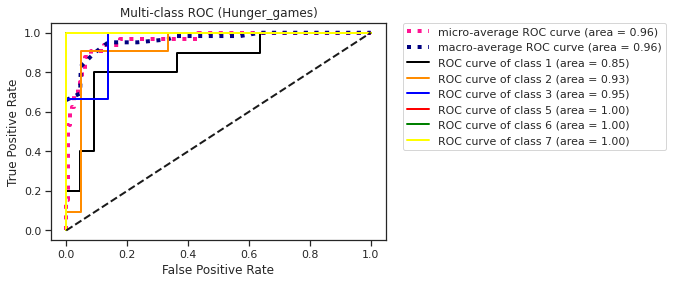

In [156]:
FinalModel = VotingClassifier(estimators=[('C31',model31),('C56',model56),('C76',model76),('C65',model65)],
      voting='soft',
  )


FinalModel.fit(X_train,np.ravel(Y_train))

Y_predF = FinalModel.predict(X_test)
Y_predFV = FinalModel.predict(X_val)
print("ROC FOR TEST SET:\n")
get_class_AUC_ROC_predict_proba(FinalModel,X_train,Y_train, X_test, Y_test)

CONFUSION MATRIX FOR TEST SET:



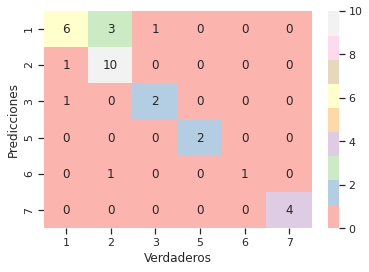

In [157]:
print("CONFUSION MATRIX FOR TEST SET:\n")
y_true=Y_test.type_of_glass
Matrix(y_true,Y_predF)

ROC FOR VALIDATION SET:



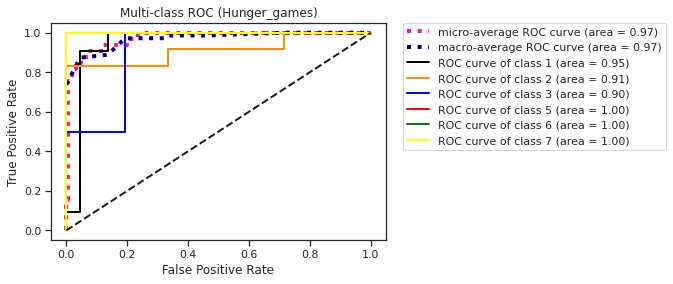

In [158]:
print("ROC FOR VALIDATION SET:\n")
get_class_AUC_ROC_predict_proba(FinalModel, X_train, Y_train, X_val, Y_val)

CONFUSION MATRIX FOR VALIDATION SET:



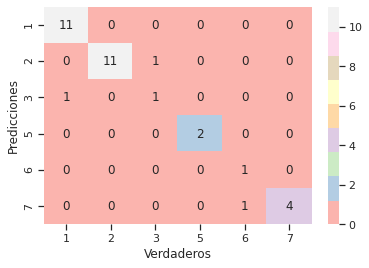

In [159]:
print("CONFUSION MATRIX FOR VALIDATION SET:\n") 
y_true=Y_val.type_of_glass
Matrix(y_true,Y_predFV)

In [160]:
print(balanced_accuracy_score(Y_test, Y_predF),f1_score(Y_test, Y_predF, average='micro'))

0.7792929292929293 0.78125


## Logistic Regresion

In [161]:
class_weights = dict(sorted((Y_train['type_of_glass'].value_counts(normalize=True)).items()))
param_grid = {'solver': ['newton-cg', 'lbfgs'],
              'penalty': ['l2', None],
              'tol': [0.1, 0.01, 0.001],
              'C': [1.0, 0.1],
              'fit_intercept': [True, False],
              'class_weight': [None, class_weights, 'balanced'],
              'random_state': [123],
              'max_iter': [21, 50, 100, 150],
              'multi_class': ['ovr', 'multinomial']}
model = LogisticRegression(n_jobs=-1)
cv = GridSearchCV(model, param_grid, scoring="roc_auc_ovr", cv=5, n_jobs=-1)

In [162]:
if Fit:
  cv.fit(X_train, np.ravel(Y_train))
  cv.cv_results_
  cv.best_estimator_

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=21, multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [231]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.59375

###Feature Importance Logistic regresion

Feature importance for Logistic Classifier:
Feature: 0, Score LR: 0.14196
Feature: 1, Score LR: -0.68064
Feature: 2, Score LR: 1.53583
Feature: 3, Score LR: -1.49570
Feature: 4, Score LR: 0.22640
Feature: 5, Score LR: 0.03461
Feature: 6, Score LR: -0.10094
Feature: 7, Score LR: 0.18796
Feature: 8, Score LR: 0.10090


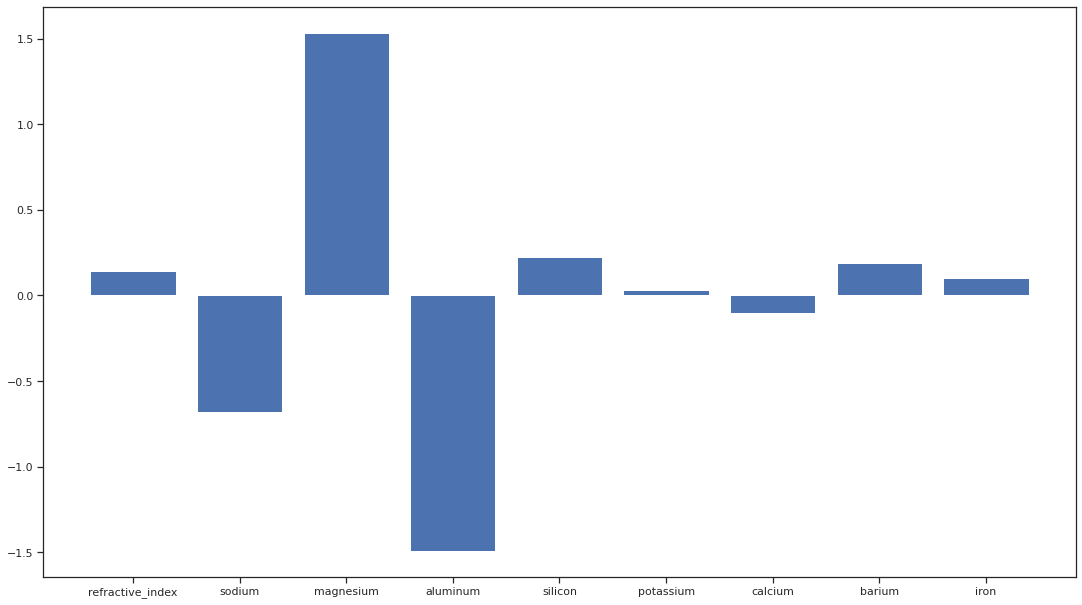

In [232]:
print('Feature importance for Logistic Classifier:')
# get importance Logistic Regression
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score LR: %.5f' % (i,v))
# plot feature importance
plt.bar(list(dataframe.columns.drop('type_of_glass')), importance)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## Gradient Boosting

In [164]:
param_grid = {'loss': ['deviance', 'exponential'],
              'learning_rate': [1.0, 0.1, 0.01],
              'n_estimators': [100, 150],
              'criterion': ['friedman_mse', 'mse', 'mae'],
              'max_depth': [3, 5, 8], 
              'min_samples_split': [4, 5, 6, 7, 8], 
              'min_samples_leaf':[1, 5],
              'max_features': [3, 5, 7]}

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
cv = GridSearchCV(model, param_grid, scoring="roc_auc_ovr", cv=5, n_jobs=-1)

In [165]:
if Fit:
  cv.fit(X_train, np.ravel(Y_train))
  cv.cv_results_

In [166]:
if Fit:
  cv.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [233]:
model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.71875

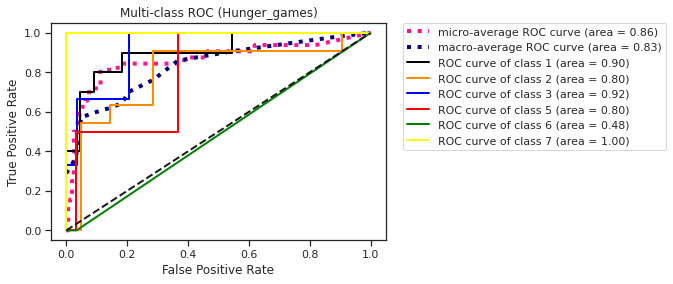

In [168]:
get_class_AUC_ROC_predict_proba(model, X_train, Y_train, X_test, Y_test)

### Feature Importance Gradient Boosting Classifier.

Feature: 0, Score GB: 0.11643
Feature: 1, Score GB: 0.04130
Feature: 2, Score GB: 0.23365
Feature: 3, Score GB: 0.24643
Feature: 4, Score GB: 0.03207
Feature: 5, Score GB: 0.02583
Feature: 6, Score GB: 0.17123
Feature: 7, Score GB: 0.10270
Feature: 8, Score GB: 0.03036


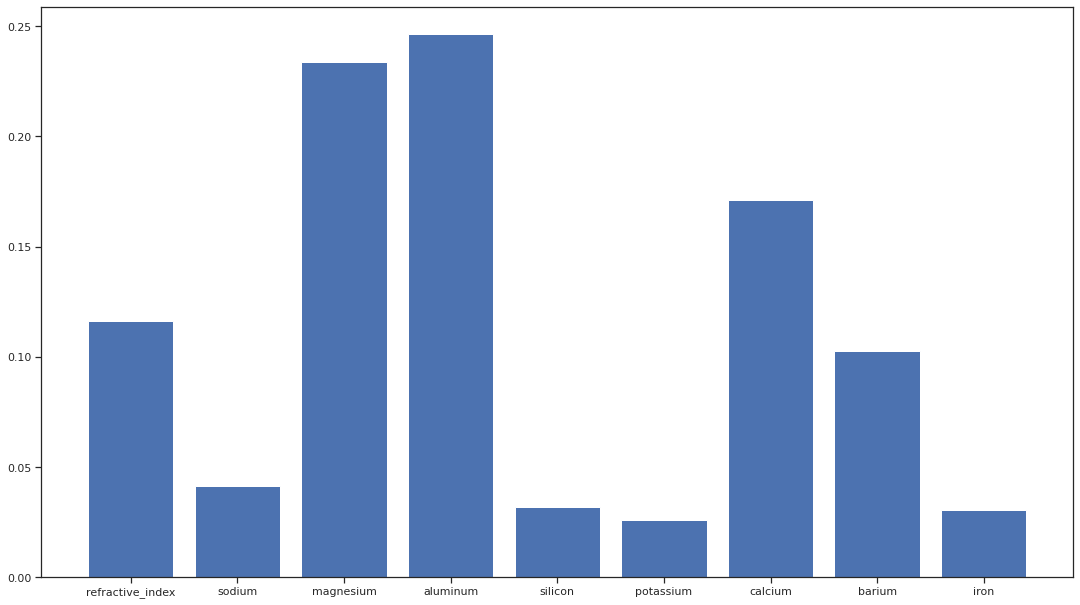

In [234]:
# get importance Gradient Boosting
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score GB: %.5f' % (i,v))
# plot feature importance
plt.bar(list(dataframe.columns.drop('type_of_glass')), importance)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## Support Vector Machines

In [174]:
param_grid = {'C': [1.0, 0.1, 0.01],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[2, 3, 4, 5],
              'gamma':['scale', 'auto'],
              'tol': [0.1, 0.01, 0.001],
              'probability':[True, False]}

model = SVC()
cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

In [175]:
if Fit:
  cv.fit(X_train, np.ravel(Y_train))
  cv.cv_results_
  cv.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.1,
    verbose=False

In [235]:
model = SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.1,
    verbose=False)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.3125

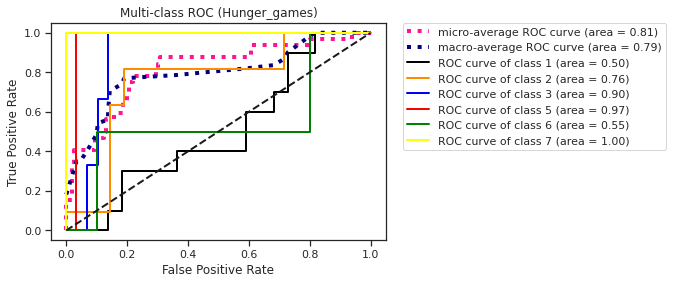

In [177]:
get_class_AUC_ROC_predict_proba(model, X_train, Y_train, X_test, Y_test)

### Feature Importance Support Vector Classfier

Feature: 0, Score SVC: -0.02371
Feature: 1, Score SVC: 0.01998
Feature: 2, Score SVC: 0.16271
Feature: 3, Score SVC: -0.18084
Feature: 4, Score SVC: 0.02927
Feature: 5, Score SVC: -0.01849
Feature: 6, Score SVC: -0.09219
Feature: 7, Score SVC: 0.00235
Feature: 8, Score SVC: -0.07044


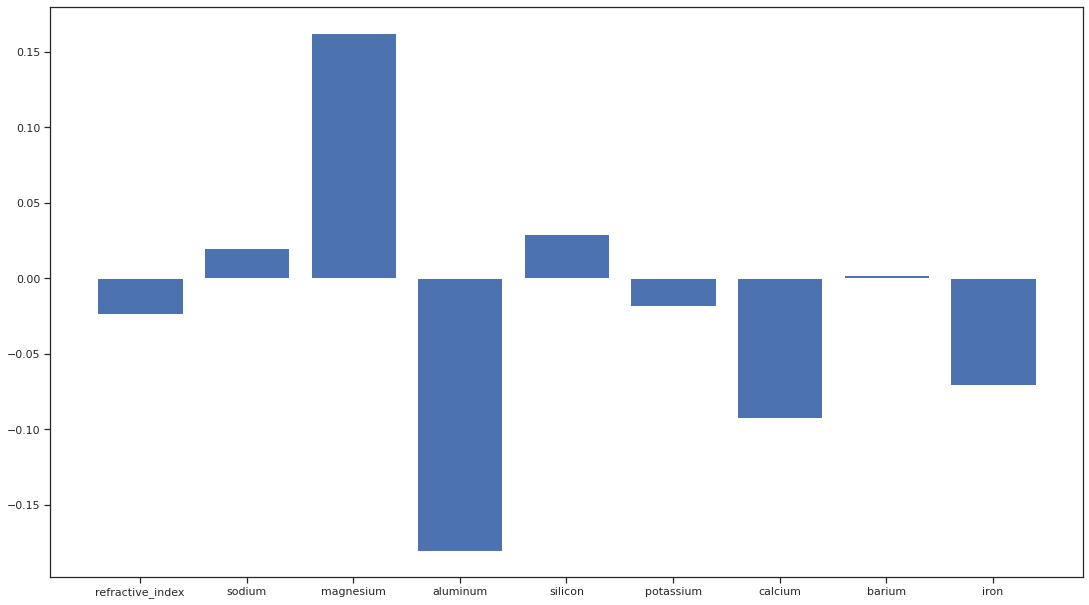

In [248]:
model8 = SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.1,
    verbose=False)
model8.fit(X_train, Y_train)
model8.score(X_test, Y_test)

# get importance
importance = model8.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score SVC: %.5f' % (i,v))
# plot feature importance
plt.bar(list(dataframe.columns.drop('type_of_glass')), importance)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## KNN

In [169]:
param_grid = {'n_neighbors': list(range(1,16)),
              'weights': ['uniform', 'distance'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[i for i in range(1,51) if not (i % 5)],
              'p':list(range(0,3)),
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'seuclidean', 'mahalanobis']}

model = KNeighborsClassifier(n_jobs=-1)
cv = GridSearchCV(model, param_grid, scoring="roc_auc_ovr", cv=5, n_jobs=-1)

In [170]:
if Fit:
  cv.fit(X_train, np.ravel(Y_train))
  cv.cv_results_
  cv.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=5, metric='mahalanobis',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=0,
                     weights='distance')

In [240]:
model = KNeighborsClassifier(algorithm='brute', leaf_size=5, metric='mahalanobis', metric_params=None, n_jobs=-1, n_neighbors=10, p=0, weights='distance')
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.75

In [172]:
if Fit:
  cv.fit(X_train, np.ravel(Y_train))
  cv.cv_results_
  cv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=0,
                     weights='distance')

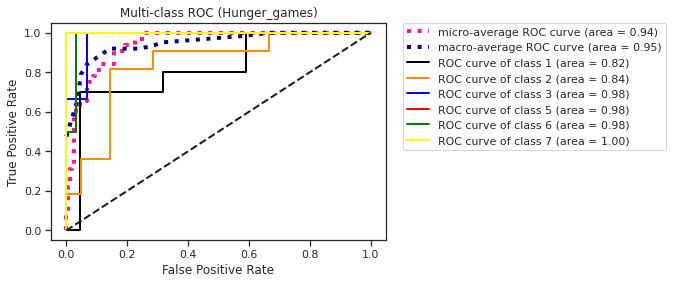

In [173]:
get_class_AUC_ROC_predict_proba(model, X_train, Y_train, X_test, Y_test)

## Naive Bayes. 

We will discard this model from the final voting classifier because its not compatible with normalized data as this contains negative numbers. Anyway this model didn't get the best performance.



In [ ]:
#param_grid = {'alpha': [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0],
#              'class_prior': [None, class_weights],
#              'fit_prior': [True, False]}

#np.random.seed(123)
#model = MultinomialNB()
#cv = GridSearchCV(model, param_grid, scoring="roc_auc_ovr", cv=5, n_jobs=-1)

In [ ]:
#model.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [ ]:
#cv.fit(X_no_ol_Z_train, np.ravel(Y_no_ol_Z_train))
#cv.cv_results_
#cv.best_estimator_

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)



In [ ]:
#np.random.seed(123)
#model = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
#model.fit(X_no_ol_Z_train, Y_no_ol_Z_train)
#model.score(X_no_ol_Z_test, Y_no_ol_Z_test)

0.6122448979591837

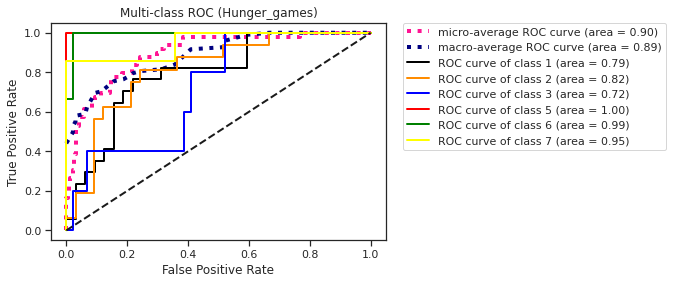

In [ ]:
#get_class_AUC_ROC_predict_proba(model, X_no_ol_Z_train, Y_no_ol_Z_train, X_no_ol_Z_test, Y_no_ol_Z_test)

# Voting Classifier with best models



## Ensemble

#### Voting Ensemble

In [198]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models


estimators = []

#Defining 5  Base Models
#Voting Classifier with 4 models RandomForest that predicts individual classes
model1 = FinalModel
estimators.append(('Voting Classifier', model1))

#Logistic Regression
model2 = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=21, multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)
estimators.append(('Logistic Regression', model2))

#Naive Bayes as commented above we will skip this model
#model3 = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
#estimators.append(('Naive Bayes', model3))

#Random Forest
model3 = modelo_AUC_R
estimators.append(('Random Forest', modelo_AUC_R))

#KNN
model4 = KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=0,
                     weights='distance')
estimators.append(('KNN', model4))

#SVM
model5 = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.1,
    verbose=False)
estimators.append(('SVM', model5))

#Gradient Boosting
model6 = GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
estimators.append(('Gradient Boosting', model6))

# Defining the grid
param_grid = {'voting': ['hard', 'soft'],
              'flatten_transform':[True, False]}

model = VotingClassifier(estimators, n_jobs=-1)
cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

In [199]:
cv.fit(X_train, np.ravel(Y_train))
cv.cv_results_


{'mean_fit_time': array([1.813867  , 1.7340723 , 1.78084683, 1.75672278]),
 'mean_score_time': array([0.12361794, 0.12377315, 0.12418847, 0.12193723]),
 'mean_test_score': array([0.7383908 , 0.71172414, 0.73816092, 0.70505747]),
 'param_flatten_transform': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_voting': masked_array(data=['hard', 'soft', 'hard', 'soft'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'flatten_transform': True, 'voting': 'hard'},
  {'flatten_transform': True, 'voting': 'soft'},
  {'flatten_transform': False, 'voting': 'hard'},
  {'flatten_transform': False, 'voting': 'soft'}],
 'rank_test_score': array([1, 3, 2, 4], dtype=int32),
 'split0_test_score': array([0.76666667, 0.66666667, 0.76666667, 0.66666667]),
 'split1_test_score': array([0.7       , 0.7       , 0.7       , 0.66666667]),
 'spl

In [200]:
cv.best_estimator_

VotingClassifier(estimators=[('Voting Classifier',
                              VotingClassifier(estimators=[('C31',
                                                            RandomForestClassifier(bootstrap=True,
                                                                                   ccp_alpha=0.0,
                                                                                   class_weight=None,
                                                                                   criterion='entropy',
                                                                                   max_depth=9,
                                                                                   max_features=5,
                                                                                   max_leaf_nodes=None,
                                                                                   max_samples=None,
                                                                               

In [250]:
model = VotingClassifier(estimators, flatten_transform=False, n_jobs=-1, voting='soft', weights=None)

model.fit(X_train, Y_train)

model.score(X_test, Y_test)


0.71875

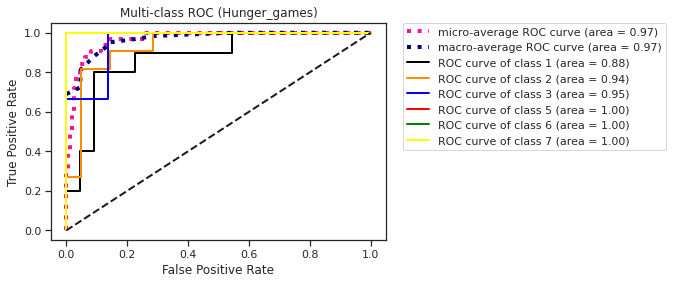

In [251]:
get_class_AUC_ROC_predict_proba(model, X_train, Y_train, X_test, Y_test)

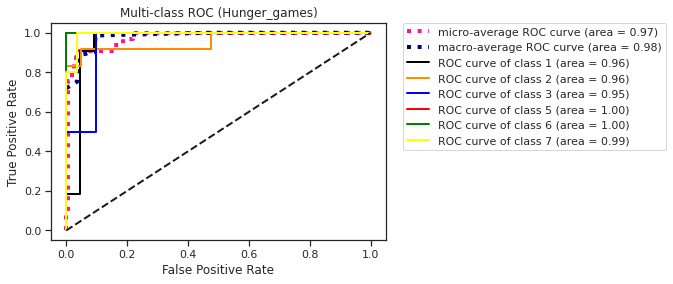

In [252]:
get_class_AUC_ROC_predict_proba(model, X_train, Y_train, X_val, Y_val)

### Base model selection

We are going to complicate it a little more by selecting the base models, groups of base models will be created to generate an ensemble with each group and evaluate its score. The best combination will be found by comparing all the possible base-models combos with sizes from 2 to N, where N is the number of input base models.


In [203]:
estimators

[('Voting Classifier', VotingClassifier(estimators=[('C31',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=9,
                                                       max_features=5,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=5,
                                                

In [204]:
dict(estimators)

{'Gradient Boosting': GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                            learning_rate=1.0, loss='deviance', max_depth=3,
                            max_features=7, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=7,
                            min_weight_fraction_leaf=0.0, n_estimators=150,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=0, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'KNN': KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='manhattan',
                      metric_params=None, n_jobs=-1, n_neighbors=15, p=0,
                      weights='distance'),
 'Logistic Regression': LogisticRegression(C=1.0, class_weight='balanced', dual=Fals

In [205]:
from itertools import combinations

# Function to get all the possible combinations of the base estimators from 2 to N size. 
#It takes the base estimators labels list as imput ans is intended to be used with the dictionary keys of the base models.

def get_all_estimators_combos(final_estimators):
  # Get all possible combinations of a list’s elements grouping size from 2 to N
  combos = []
  for size in range(2, len(final_estimators)+1):
    combos.append(list(combinations(final_estimators, size)))
    
  return combos

In [206]:
from time import sleep
from tqdm.notebook import tqdm


# Function to perform the model evaluation of the generated ensemble models (Voting Classifier or Bagging) of all the base estimators combinations.
# Returns a dataframe with the scores for all the combos.

# Optional parameters: 
#   grid_search: (True, False), default: False

# The metrics used will be balanced_accuracy and f1_micro scores
def voting_ensemble_model_selection_evaluation(estimators, X_train, Y_train, X_test, Y_test, grid_search=False):
    # First we get a dict from the base estimators list created before
    estimators_dict = dict(estimators)

    # Get the combos
    base_combos = get_all_estimators_combos(estimators_dict.keys())

    # List to hold the combo measures
    combo_scores = []

    # For each group size (combo order) get the combos
    for i in tqdm(range(len(base_combos))):
        # For each combo within the same group size
        for combo in base_combos[i]:
            order = len(combo)

            # Get the list of input tuples ('base_model_label', model) for the ensemble
            estimators_combo = []
            for base_model in combo:
                estimators_combo.append((base_model, estimators_dict[base_model]))

            # Check grid_search for defining the voting model
            if grid_search == True:
                # Defining the grid
                param_grid = {'voting': ['hard', 'soft'], 'flatten_transform': [True, False]}

                # Fit the ensemble model
                np.random.seed(123)
                model = VotingClassifier(estimators, n_jobs=-1)
                cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
                cv.fit(X_train, np.ravel(Y_train))
            elif grid_search == False:
                # Fit the ensemble model
                np.random.seed(123)
                cv = VotingClassifier(estimators_combo, flatten_transform=False, n_jobs=-1, voting='soft', weights=None)
                cv.fit(X_train, np.ravel(Y_train))
            else:
                print('ERROR: grid_search must be Boolean if provided')

            # balanced_accuracy, f1_micro scores
            y_pred = cv.predict(X_test)
            balanced_accuracy_score_ = balanced_accuracy_score(Y_test, y_pred)
            f1_micro_score_ = f1_score(Y_test, y_pred, average='micro')

            # Check grid_search for defining the output dataframe's tuples
            if grid_search == True:
                print((order, combo, balanced_accuracy_score_, f1_micro_score_))
                combo_scores.append((order, combo, balanced_accuracy_score_, f1_micro_score_, cv.best_estimator_))
            else:
                print((order, combo, balanced_accuracy_score_, f1_micro_score_))
                combo_scores.append((order, combo, balanced_accuracy_score_, f1_micro_score_, cv))

    return pd.DataFrame(combo_scores, columns=['order', 'combo', 'balanced_accuracy_score', 'f1_micro_score', 'best_estimator'])

In [208]:
combo_scores = voting_ensemble_model_selection_evaluation(estimators, X_train, Y_train, X_test, Y_test, grid_search=False)

(2, ('Voting Classifier', 'Logistic Regression'), 0.7792929292929293, 0.78125)
(2, ('Voting Classifier', 'Random Forest'), 0.7626262626262627, 0.75)
(2, ('Voting Classifier', 'KNN'), 0.7015151515151515, 0.78125)
(2, ('Voting Classifier', 'SVM'), 0.6848484848484849, 0.75)
(2, ('Voting Classifier', 'Gradient Boosting'), 0.5722222222222223, 0.71875)
(2, ('Logistic Regression', 'Random Forest'), 0.8626262626262626, 0.8125)
(2, ('Logistic Regression', 'KNN'), 0.5196969696969697, 0.6875)
(2, ('Logistic Regression', 'SVM'), 0.6696969696969696, 0.71875)
(2, ('Logistic Regression', 'Gradient Boosting'), 0.5722222222222223, 0.71875)
(2, ('Random Forest', 'KNN'), 0.7681818181818182, 0.78125)
(2, ('Random Forest', 'SVM'), 0.6848484848484849, 0.75)
(2, ('Random Forest', 'Gradient Boosting'), 0.5722222222222223, 0.71875)
(2, ('KNN', 'SVM'), 0.503030303030303, 0.65625)
(2, ('KNN', 'Gradient Boosting'), 0.5722222222222223, 0.71875)
(2, ('SVM', 'Gradient Boosting'), 0.5722222222222223, 0.71875)
(3, ('V

In [209]:
combo_scores.head(10)

order  ...                                     best_estimator
0      2  ...  VotingClassifier(estimators=[('Voting Classifi...
1      2  ...  VotingClassifier(estimators=[('Voting Classifi...
2      2  ...  VotingClassifier(estimators=[('Voting Classifi...
3      2  ...  VotingClassifier(estimators=[('Voting Classifi...
4      2  ...  VotingClassifier(estimators=[('Voting Classifi...
5      2  ...  VotingClassifier(estimators=[('Logistic Regres...
6      2  ...  VotingClassifier(estimators=[('Logistic Regres...
7      2  ...  VotingClassifier(estimators=[('Logistic Regres...
8      2  ...  VotingClassifier(estimators=[('Logistic Regres...
9      2  ...  VotingClassifier(estimators=[('Random Forest',...

[10 rows x 5 columns]

In [210]:
# Function to perform the model selection of the previously generated evaluations. 
# It will select the model(s) with the highest score for both metrics (balanced_accuracy and f1_micro). 
# If there is any tie for each metric, it will keep the model(s) with the lower order.

def voting_ensemble_best_models_selection(combo_scores_df):
  # Best f1_micro score(s)
  best_f1_scores_df = combo_scores_df[combo_scores_df.f1_micro_score == combo_scores_df.f1_micro_score.max()]
  # In case of any tie, we keep the simpler ones (lower order)
  best_f1_scores_df = best_f1_scores_df[best_f1_scores_df.order == best_f1_scores_df.order.min()]
  
  # Best balanced_accuracy score(s)
  best_balanced_acc_scores_df = combo_scores_df[combo_scores_df.balanced_accuracy_score == combo_scores_df.balanced_accuracy_score.max()]
  # In case of any tie, we keep the simpler ones (lower order)
  best_balanced_acc_scores_df = best_balanced_acc_scores_df[best_balanced_acc_scores_df.order == best_balanced_acc_scores_df.order.min()]
  
  # Get their union, removing dupes
  best_models = pd.concat([best_f1_scores_df,best_balanced_acc_scores_df],ignore_index=True).drop_duplicates().reset_index(drop=True)

  return best_models

In [211]:
best_models = voting_ensemble_best_models_selection(combo_scores)
best_models

order  ...                                     best_estimator
0      2  ...  VotingClassifier(estimators=[('Logistic Regres...

[1 rows x 5 columns]

# ROC AUC for the winner model
We can see the model beats the initial Voting Classifier with all the base models regarding the balanced accuracy and f1 micro scores. Eventhough if we compare both models'ROC AUC, the initial voting classifier performs slightly better.


In [212]:

model = best_models['best_estimator'][0]
model.fit(X_train, Y_train)
model.score(X_test, Y_test)


0.8125

CONFUSION MATRIX AND ROC FOR TEST SET:



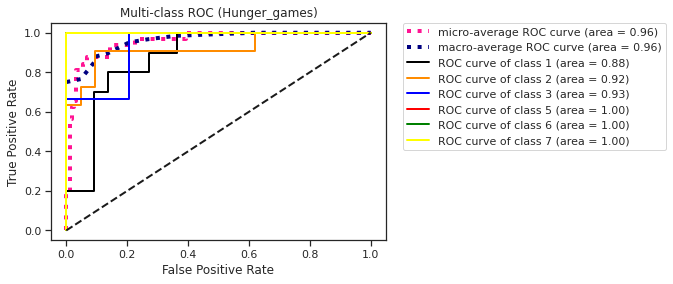

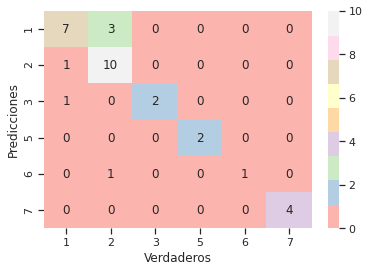

CONFUSION MATRIX AND ROC FOR VALIDATION SET:



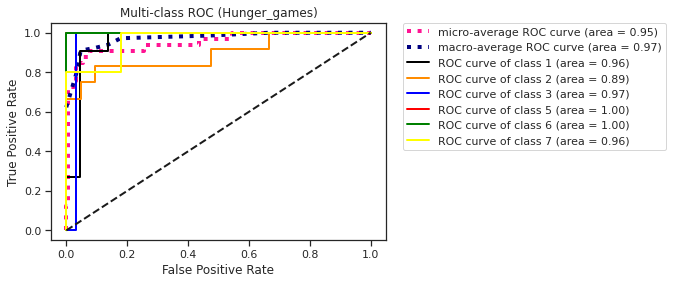

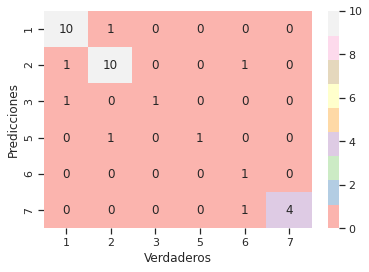

In [213]:
print("CONFUSION MATRIX AND ROC FOR TEST SET:\n")
get_class_AUC_ROC_predict_proba(model, X_train, Y_train, X_test, Y_test)
y_true=Y_test.type_of_glass
Matrix(y_true,model.predict(X_test))

print("CONFUSION MATRIX AND ROC FOR VALIDATION SET:\n")
get_class_AUC_ROC_predict_proba(model, X_train, Y_train, X_val, Y_val)
y_true=Y_val.type_of_glass
Matrix(y_true,model.predict(X_val))